# Predict if the accident has injury person

In [33]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/Users/davidyu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


ADDRTYPE

In [35]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [36]:
dictionaryADDRTYPE = {"Block": 1, "Intersection": 2, "Alley": 3}
df['ADDRTYPE'] = df['ADDRTYPE'].map(dictionaryADDRTYPE)
df = df[pd.to_numeric(df['ADDRTYPE'], errors='coerce').notnull()]
df['ADDRTYPE'] = df['ADDRTYPE'].astype('int')

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,2,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,1,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,1,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,1,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,2,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


WEATHER

In [37]:
df['WEATHER'].value_counts()

Clear                       110626
Raining                      33004
Overcast                     27584
Unknown                      14107
Snowing                        902
Other                          798
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [38]:
dictionaryWEATHER = {"Clear": 1, 
                     "Raining": 2, 
                     "Overcast": 3, 
                     "Unknown": 4,  
                     "Snowing": 5, 
                     "Other": 6, 
                     "Fog/Smog/Smoke": 7, 
                     "Sleet/Hail/Freezing Rain": 8,
                     "Blowing Sand/Dirt": 9,
                     "Severe Crosswind": 10,
                     "Partly Cloudy": 11}
df['WEATHER'] = df['WEATHER'].map(dictionaryWEATHER)
df = df[pd.to_numeric(df['WEATHER'], errors='coerce').notnull()]
df['WEATHER'] = df['WEATHER'].astype('int')

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,2,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,1,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,1,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,1,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,2,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


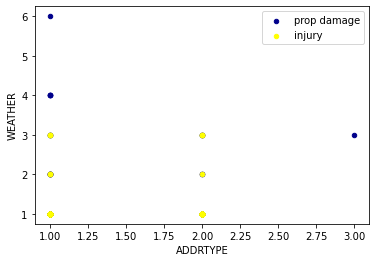

In [39]:
ax = df[df['SEVERITYCODE'] == 1][0:50].plot(kind='scatter', x='ADDRTYPE', y='WEATHER', color='DarkBlue', label='prop damage');
df[df['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='ADDRTYPE', y='WEATHER', color='Yellow', label='injury', ax=ax);
plt.show()

ROADCOND

In [40]:
df['3. '].value_counts()

Dry               123867
Wet                47256
Unknown            14043
Ice                 1193
Snow/Slush           995
Other                125
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

In [41]:
dictionaryROADCOND = {"Dry": 1, 
                      "Wet": 2, 
                      "Unknown": 3, 
                      "Ice": 4,  
                      "Snow/Slush": 5, 
                      "Other": 6, 
                      "Standing Water": 7, 
                      "Sand/Mud/Dirt": 8,
                      "Oil": 9}
df['ROADCOND'] = df['ROADCOND'].map(dictionaryROADCOND)
df = df[pd.to_numeric(df['ROADCOND'], errors='coerce').notnull()]
df['ROADCOND'] = df['ROADCOND'].astype('int')

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,2,37475.0,...,2,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,1,NaN,...,2,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,1,NaN,...,1,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,1,NaN,...,1,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,2,34387.0,...,2,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


LIGHTCOND

In [42]:
df['LIGHTCOND'].value_counts()

Daylight                    115408
Dark - Street Lights On      48236
Unknown                      12599
Dusk                          5843
Dawn                          2491
Dark - No Street Lights       1526
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [43]:
dictionaryLIGHTCOND = {"Daylight": 1, 
                       "Dark - Street Lights On": 2, 
                       "Unknown": 3, 
                       "Dusk": 4,  
                       "Dawn": 5, 
                       "Dark - No Street Lights": 6, 
                       "Dark - Street Lights Off ": 7, 
                       "Other": 8,
                       "Dark - Unknown Lighting": 9}
df['LIGHTCOND'] = df['LIGHTCOND'].map(dictionaryLIGHTCOND)
df = df[pd.to_numeric(df['LIGHTCOND'], errors='coerce').notnull()]
df['LIGHTCOND'] = df['LIGHTCOND'].astype('int')

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,2,37475.0,...,2,1,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,1,NaN,...,2,2,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,1,NaN,...,1,1,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,1,NaN,...,1,1,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,2,34387.0,...,2,1,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


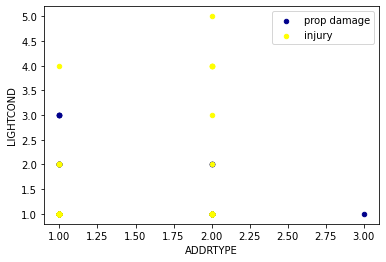

In [45]:
ax = df[df['SEVERITYCODE'] == 1][0:50].plot(kind='scatter', x='ADDRTYPE', y='ROADCOND', color='DarkBlue', label='prop damage');
df[df['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='ADDRTYPE', y='LIGHTCOND', color='Yellow', label='injury', ax=ax);
plt.show()

In [47]:
feature_df = df[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
X = np.asarray(feature_df)
X[0:5]

array([[2, 3, 2, 1],
       [1, 2, 2, 2],
       [1, 3, 1, 1],
       [1, 1, 1, 1],
       [2, 2, 2, 1]])

In [48]:
y = np.asarray(df['SEVERITYCODE'])
y [0:5]

array([2, 1, 1, 1, 2])

## Train/Test dataset

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (149072, 4) (149072,)
Test set: (37269, 4) (37269,)


In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [51]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

## Evaluation

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     25907
           2       0.50      0.00      0.00     11362

    accuracy                           0.70     37269
   macro avg       0.60      0.50      0.41     37269
weighted avg       0.64      0.70      0.57     37269

Confusion matrix, without normalization
[[4 0]
 [0 0]]


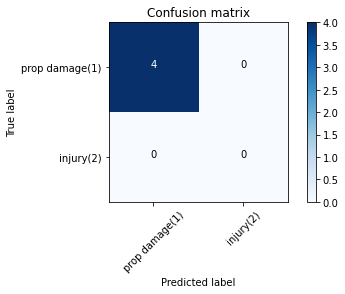

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['prop damage(1)','injury(2)'],normalize= False,  title='Confusion matrix')

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5703161831648828